## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Segmentation quality](https://sbonaretti.github.io/pyKNEEr/segmentation.html)

Segmentation quality is evaluated using 3 overlap agreement measures [1]:  
- Dice coefficient  
- Jaccard coefficient 
- Volume similarity  

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI1/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI1_segmented.zip" 
zipped_gt_name     = "OAI1_segmented_QM.zip"
local_gt_name      = "/segmented_QM"
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_segmentation_quality_OAI1_T2_0.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# download ground truth imagess
wget.download(input_URL + zipped_gt_name, local_folder_name + zipped_gt_name)

In [ ]:
# unzip image folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# unzip ground truth images
with ZipFile(local_folder_name + zipped_gt_name, 'r') as zip: 
    zip.extractall(local_folder_name + local_gt_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io                  as io
from pykneer import segmentation_quality_for_nb as sq

## Image information

Input and output:   
- `input_file_name` contains the list of the masks segmented using pyKNEEr and of ground truth masks
- `output_file_name` contains the table of the overlap coefficients

In [3]:
# input_file_name  = "./image_list_segmentation_quality_OAI1_T2_0.txt" # commented out because downloaded from GitHub
output_file_name = "overlapCoeff_OAI1_T2_0.csv"

#### Reading image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_segmentation_quality(input_file_name)

-> image information loaded


## Calculate overlap coefficients

In [5]:
dice_coeff, jacc_coeff, vol_simil = sq.compute_overlap(image_data)

## Visualizing overlap coefficients

The values of overlap coefficient are visualized as:
- a GRAPH, to visually observe the trend of the dataset 
- a TABLE, to observe the numerical values

#### GRAPH: Dots represent the coefficient value

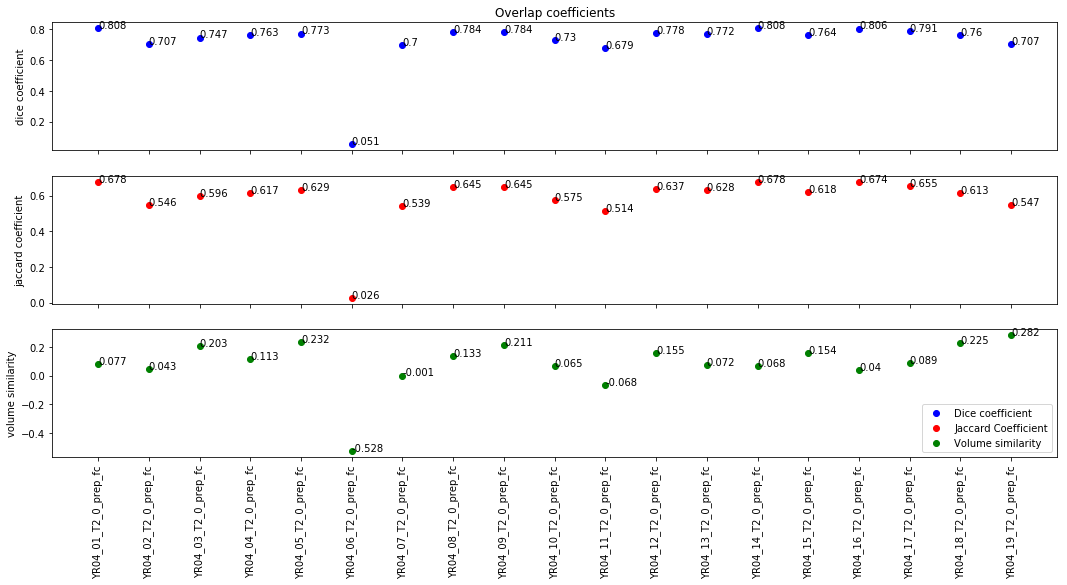

In [6]:
sq.overlap_coeff_graph(image_data, dice_coeff, jacc_coeff, vol_simil)

#### TABLE: Overlap coefficients per image
The table is saved as a .csv file for subsequent analyisis

In [7]:
coeff = sq.overlap_coeff_table(image_data, dice_coeff, jacc_coeff, vol_simil, output_file_name)
display(coeff)

Table saved as: overlapCoeff_OAI1_T2_0.csv


,Subjects,DiceCoeff,JaccardCoeff,VolumeSimilarity
1,YR04_01_T2_0_prep_fc,0.81,0.68,0.08
2,YR04_02_T2_0_prep_fc,0.71,0.55,0.04
3,YR04_03_T2_0_prep_fc,0.75,0.60,0.20
4,YR04_04_T2_0_prep_fc,0.76,0.62,0.11
5,YR04_05_T2_0_prep_fc,0.77,0.63,0.23
6,YR04_06_T2_0_prep_fc,0.05,0.03,-0.53
7,YR04_07_T2_0_prep_fc,0.70,0.54,-0.00
8,YR04_08_T2_0_prep_fc,0.78,0.65,0.13
9,YR04_09_T2_0_prep_fc,0.78,0.65,0.21
10,YR04_10_T2_0_prep_fc,0.73,0.58,0.07


### References

[1] Tustison N.J., Gee J.C. [*Introducing Dice, Jaccard, and Other Label Overlap Measures To ITK*](http://insight-journal.org/browse/publication/707) The Insight Journal. July-December. 2009.

### Dependencies

In [8]:
%load_ext watermark
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,plotnine

CPython 3.7.1
IPython 6.5.0

SimpleITK unknown
matplotlib 2.2.3
numpy 1.15.1
pandas 0.23.4
plotnine not installed

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
